In [1]:
__version__ = "1.1"

# Stock Visualization

In [1]:
# common.py
import common
from common import symmetric_simple_moving_average, calc_total_days

# parameters.py
from parameters import get_parameters_profit_without_losses

# stock_system.py
import stock_system as SS
from stock_system import simulate

# visualization_functions.py
import visualization_functions as vf
from visualization_functions import *

# Time functions
from datetime import datetime, timedelta
import calendar

# General
import numpy as np
import pandas as pd

In [2]:
libraries = [np, pd, SS, vf, common]
for lib in libraries:
    print(f"{lib.__name__:>23}: {lib.__version__}")

                  numpy: 1.18.5
                 pandas: 1.0.5
           stock_system: 2.3
visualization_functions: 1.0
                 common: 1.0


In [3]:
SS.set_random_state(42)
np.random.seed(42)

# Simulation Execution

In [5]:
parameters, months = get_parameters_profit_without_losses()
results = simulate(**parameters)
results = results.set_index('timestamp')

# Flow Plots

In [5]:
initial_stock_cost = parameters['unit_cost'] * parameters['initial_stock_level']

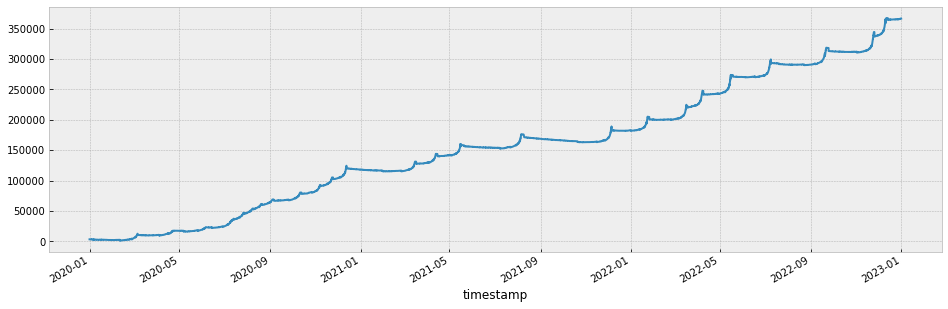

In [7]:
results['capital'].plot()

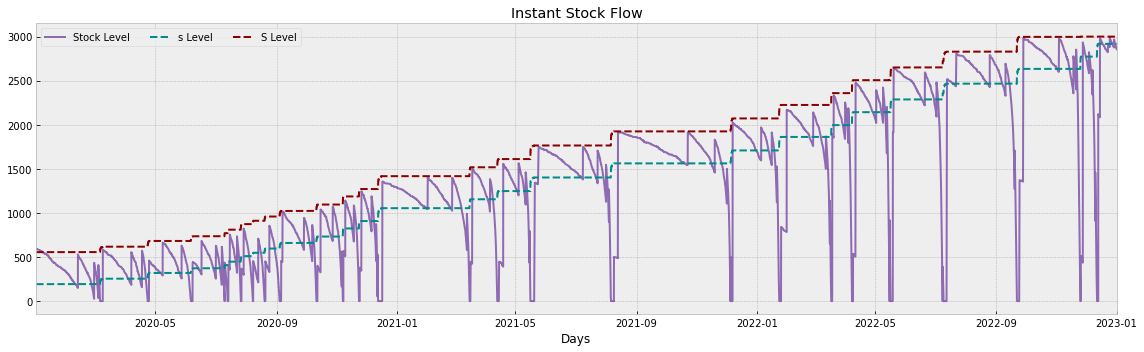

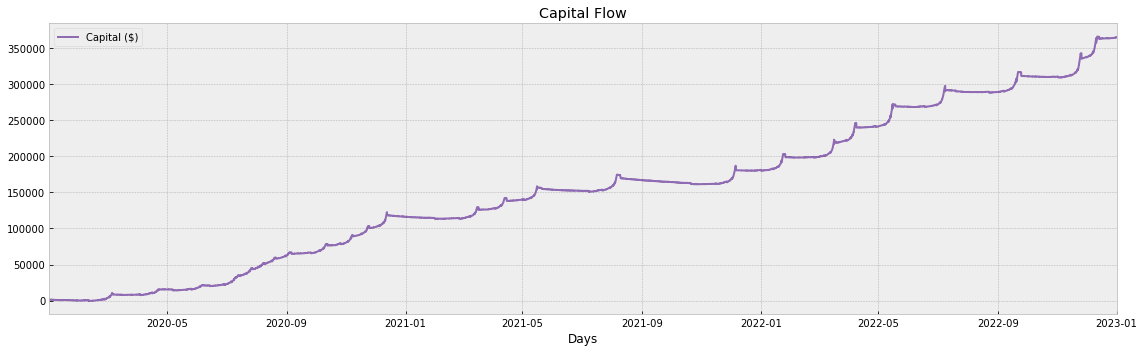

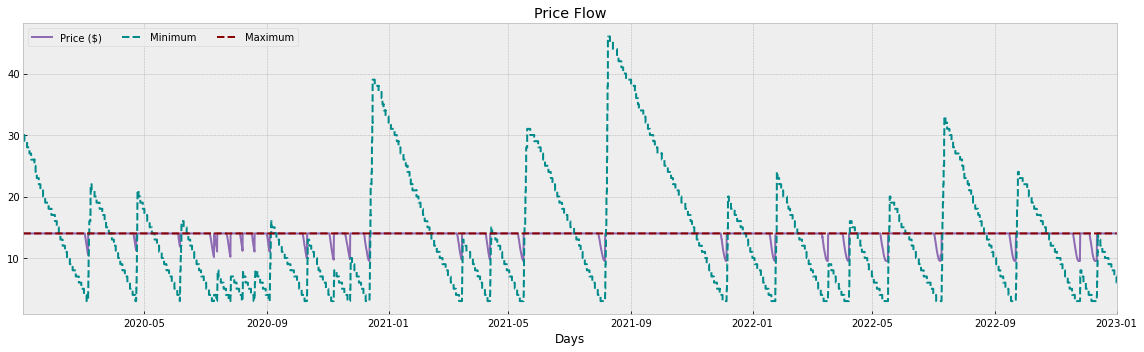

In [9]:
flow_plot(results['stock'],results['stock_floor'],results['stock_ceiling'],'Instant Stock Flow','Stock Level','s Level','S Level','',with_floor=True,with_ceiling=True)
flow_plot(results['capital']-initial_stock_cost,results['stock_floor'],results['stock_ceiling'],'Capital Flow','Capital ($)','s Level','S Level','',with_floor=False,with_ceiling=False)
flow_plot(results['price'],results['price_floor'],results['price_ceiling'],'Price Flow','Price ($)','Minimum','Maximum','',with_floor=True,with_ceiling=True)

# Period plots

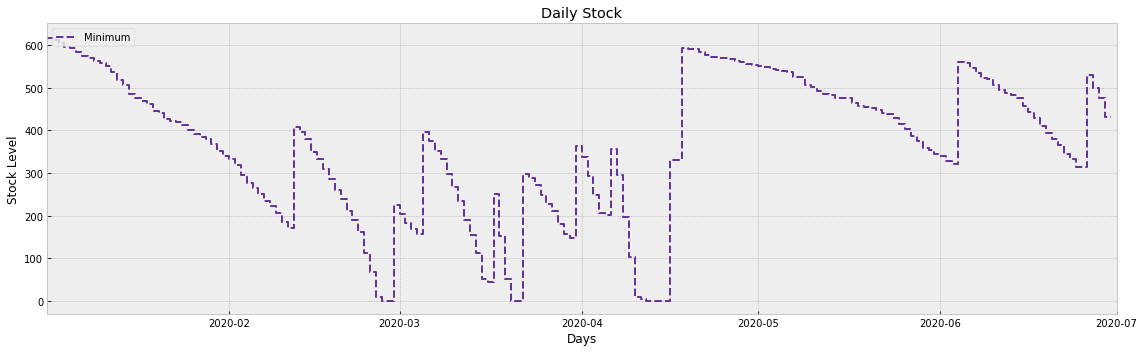

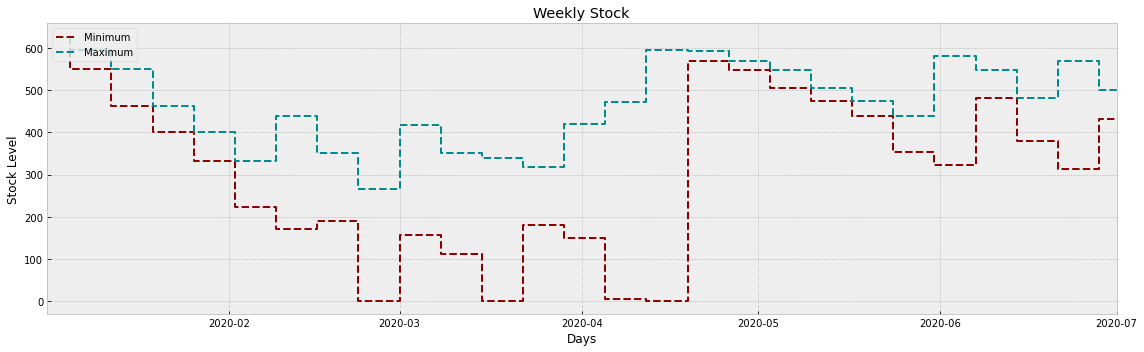

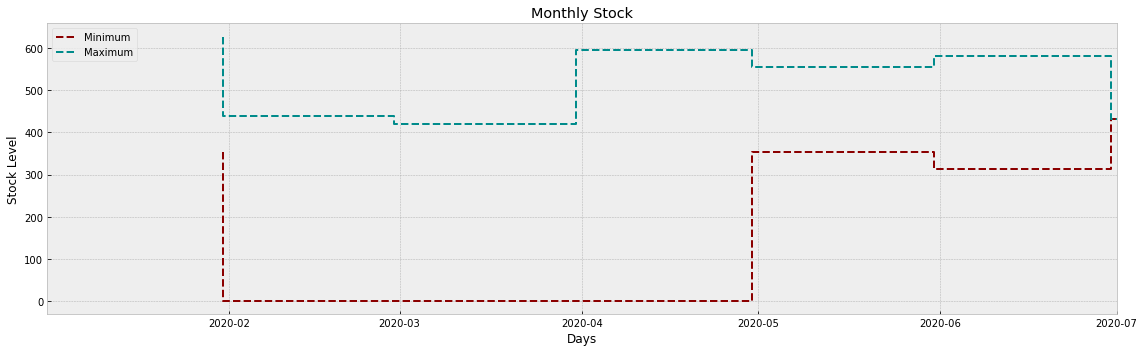

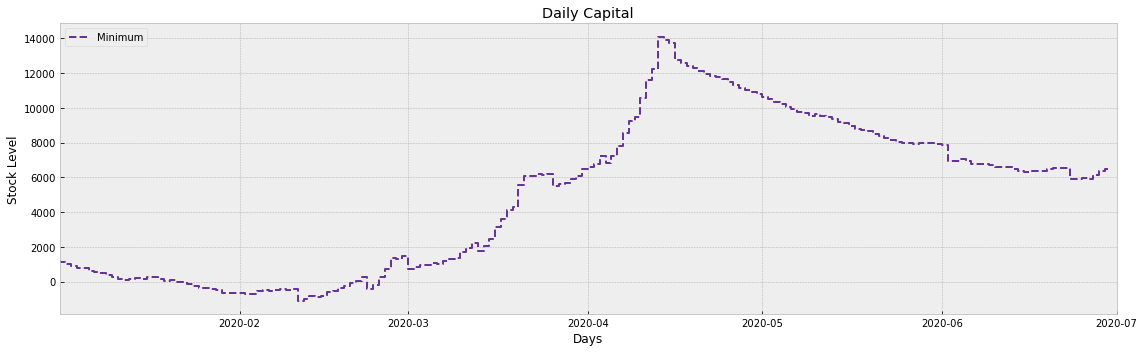

In [9]:
plot_aggregate_with_period(results['stock'], 'D', 'Daily Stock', max_=False)
plot_aggregate_with_period(results['stock'], '1W', 'Weekly Stock') #TROUBLE WITH 7D INSTEAD OF 1W
plot_aggregate_with_period(results['stock'], '1M', 'Monthly Stock')
plot_aggregate_with_period(results['capital']-initial_stock_cost, 'D', 'Daily Capital', max_=False)

# Plot time series

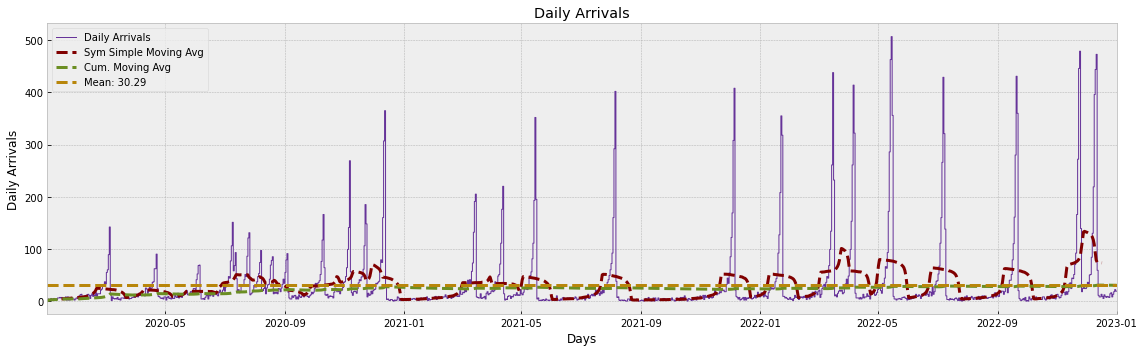

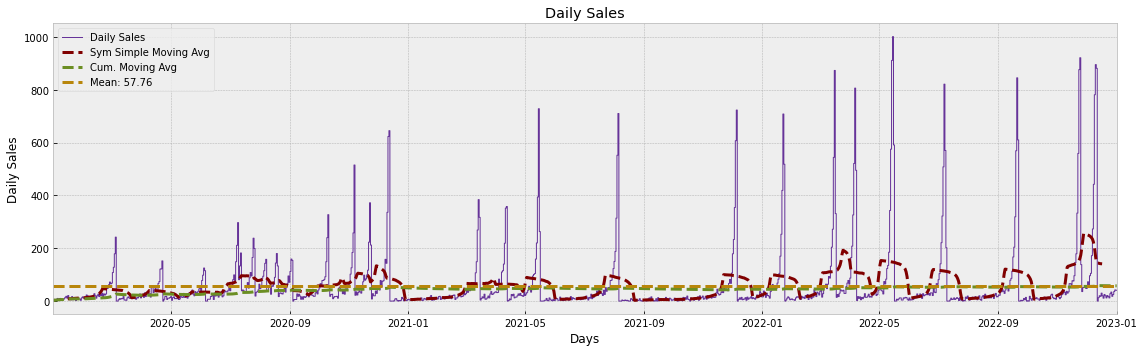

In [10]:
plot_time_series(results['arrivals'], 'D', "Daily Arrivals", min_=True)
plot_time_series(results['sales'], 'D', "Daily Sales", min_=True)

# Plot Scatter

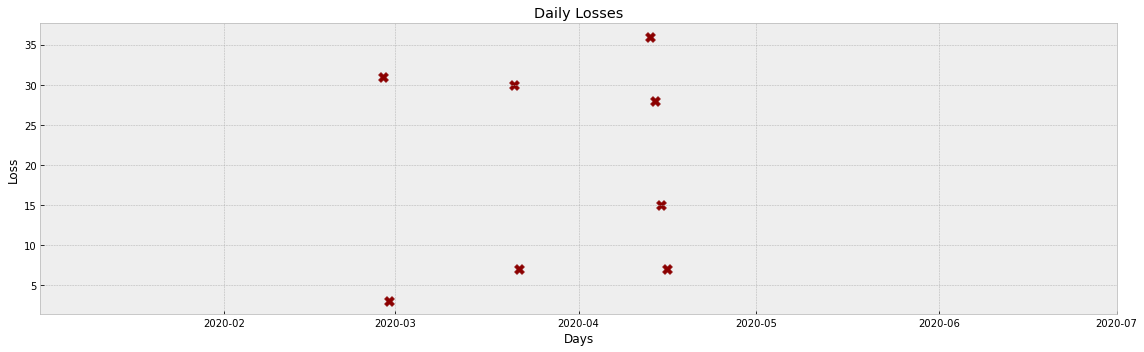

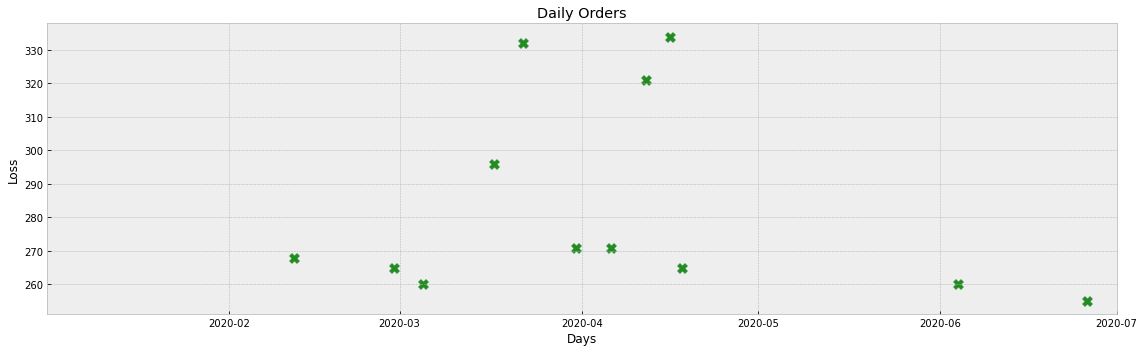

In [11]:
plot_scatter(results['losses'], 'D', "Daily Losses", 'darkred')
plot_scatter(results['orders'], 'D', "Daily Orders", 'forestgreen')